# Movie Rating Prediction with Python

## Load data

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [66]:
imdb = pd.read_csv("C:\\Users\PREET PAUL\Desktop\Presidency University M.Sc. Notes\Codsoft\IMDb Movies India.csv")
imdb

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
imdb.shape

(15509, 10)

In [68]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [69]:
imdb.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


## Detecting Missing values

* **isnull** is a function for detecting missing values

In [70]:
imdb.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [71]:
imdb.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [72]:
imdb.shape

(15509, 10)

In [73]:
# Display only rows with atleast 1 missing values
# Note: axis of 0 = rows, axis of 1 = columns

imdb[imdb.isnull().any(axis=1)]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
7,.in for Motion,-2008.0,59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
14,101 Ratein,-1990.0,NaN,Thriller,NaN,NaN,Harish,Saraswati,Disco Shanti,NaN
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,-1992.0,NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15502,Zulm Ki Pukar,-1979.0,NaN,Action,NaN,NaN,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN


<Axes: >

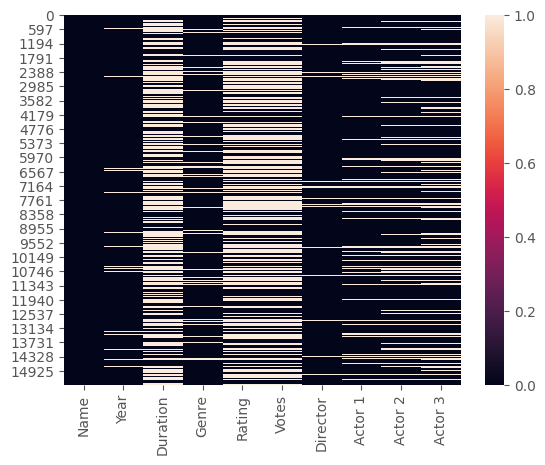

In [74]:
# Heatmap of the missing values

sns.heatmap(imdb.isnull())

In [75]:
# percentage of missing values in each of the variables

per_missing = imdb.isnull().sum()*100/len(imdb)
per_missing

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

In [76]:
print(imdb.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


## Check for Duplicate Data

In [77]:
dup_data = imdb.duplicated().any()
dup_data

True

## Drop Missing Data

* In handling missing data i.e. 'NaN', we have to drop the rows of the dataset here. Because, it will be illogical if we
    replace the missing values of 'Duration' or 'Votes' by their mean values or 0.

In [78]:
# Drop rows that have at least 1 missing value

imdb.dropna(inplace = True)

In [79]:
imdb

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,-2015.0,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,-2001.0,153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,-1989.0,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


## Splitting the column Duration as it is a continuous variable

In [80]:
# Splitting the column 'Duration'

imdb['Duration'].str.split(" ",expand = True)

,0,1
1,109,min
3,110,min
5,147,min
6,142,min
8,82,min
...,...,...
15493,115,min
15494,153,min
15503,125,min
15505,129,min


In [81]:
imdb['Duration'].str.split(" ",expand = True)[0].astype(float)

1        109.0
3        110.0
5        147.0
6        142.0
8         82.0
         ...  
15493    115.0
15494    153.0
15503    125.0
15505    129.0
15508    130.0
Name: 0, Length: 5659, dtype: float64

In [82]:
# Making a new variable 'Duration' which contains only the numeric values & 'Votes' & 'Year' which contains integer values

imdb['Duration'] = imdb['Duration'].str.split(" ",expand = True)[0].astype(float)
imdb['Votes'] = imdb['Votes'].str.replace(',','').astype(int)
imdb

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,-2015.0,115.0,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,-2001.0,153.0,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,-1989.0,125.0,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,-1999.0,129.0,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [83]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   float64
 2   Duration  5659 non-null   float64
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int32  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(3), int32(1), object(6)
memory usage: 464.2+ KB


In [84]:
imdb = imdb.drop(columns=['Director','Actor 1','Actor 2','Actor 3'])
imdb.head()

,Name,Year,Duration,Genre,Rating,Votes
1,#Gadhvi (He thought he was Gandhi),-2019.0,109.0,Drama,7.0,8
3,#Yaaram,-2019.0,110.0,"Comedy, Romance",4.4,35
5,...Aur Pyaar Ho Gaya,-1997.0,147.0,"Comedy, Drama, Musical",4.7,827
6,...Yahaan,-2005.0,142.0,"Drama, Romance, War",7.4,1086
8,?: A Question Mark,-2012.0,82.0,"Horror, Mystery, Thriller",5.6,326


## Splitting the column Genre into three columns

In [85]:
# Making three new columns 'Genre1', 'Genre2' and 'Genre3'

imdb['Genre1'] = imdb['Genre'].str.split(" ",expand = True)[0]
imdb['Genre2'] = imdb['Genre'].str.split(" ",expand = True)[1]
imdb['Genre3'] = imdb['Genre'].str.split(" ",expand = True)[2]

In [86]:
# Dropping the older variable 'Genre'

data = imdb.drop(["Genre","Name"],axis=1)
data

,Year,Duration,Rating,Votes,Genre1,Genre2,Genre3
1,-2019.0,109.0,7.0,8,Drama,None,None
3,-2019.0,110.0,4.4,35,"Comedy,",Romance,None
5,-1997.0,147.0,4.7,827,"Comedy,","Drama,",Musical
6,-2005.0,142.0,7.4,1086,"Drama,","Romance,",War
8,-2012.0,82.0,5.6,326,"Horror,","Mystery,",Thriller
...,...,...,...,...,...,...,...
15493,-2015.0,115.0,6.1,408,Drama,None,None
15494,-2001.0,153.0,6.2,1496,"Biography,","Drama,",History
15503,-1989.0,125.0,5.8,44,"Action,","Crime,",Drama
15505,-1999.0,129.0,4.5,655,"Action,",Drama,None


In [87]:
print(data.shape)
print(data.isna().sum())

(5659, 7)
Year           0
Duration       0
Rating         0
Votes          0
Genre1         0
Genre2      1658
Genre3      3340
dtype: int64


In [88]:
# Replacing the missing values in 'Genre2' and 'Genre3' by 0

for i in data.index:
    if data.at[i, 'Genre2'] == 0:
        data.at[i, 'Genre2'] = data.at[i, 'Genre1']
    elif data.at[i, 'Genre3'] == 0:
        data.at[i, 'Genre3'] = data.at[i, 'Genre2']

print(data.isna().sum())

Year           0
Duration       0
Rating         0
Votes          0
Genre1         0
Genre2      1658
Genre3      3340
dtype: int64


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      5659 non-null   float64
 1   Duration  5659 non-null   float64
 2   Rating    5659 non-null   float64
 3   Votes     5659 non-null   int32  
 4   Genre1    5659 non-null   object 
 5   Genre2    4001 non-null   object 
 6   Genre3    2319 non-null   object 
dtypes: float64(3), int32(1), object(3)
memory usage: 460.6+ KB


In [90]:
data

,Year,Duration,Rating,Votes,Genre1,Genre2,Genre3
1,-2019.0,109.0,7.0,8,Drama,None,None
3,-2019.0,110.0,4.4,35,"Comedy,",Romance,None
5,-1997.0,147.0,4.7,827,"Comedy,","Drama,",Musical
6,-2005.0,142.0,7.4,1086,"Drama,","Romance,",War
8,-2012.0,82.0,5.6,326,"Horror,","Mystery,",Thriller
...,...,...,...,...,...,...,...
15493,-2015.0,115.0,6.1,408,Drama,None,None
15494,-2001.0,153.0,6.2,1496,"Biography,","Drama,",History
15503,-1989.0,125.0,5.8,44,"Action,","Crime,",Drama
15505,-1999.0,129.0,4.5,655,"Action,",Drama,None


### Factorizing the columns 'Genre1', 'Genre2' and 'Genre3'

In [91]:
for col in ["Genre1","Genre2","Genre3"]:
    data[col], _ = pd.factorize(data[col])

data.head()

,Year,Duration,Rating,Votes,Genre1,Genre2,Genre3
1,-2019.0,109.0,7.0,8,0,-1,-1
3,-2019.0,110.0,4.4,35,1,0,-1
5,-1997.0,147.0,4.7,827,1,1,0
6,-2005.0,142.0,7.4,1086,2,2,1
8,-2012.0,82.0,5.6,326,3,3,2


### In which year, there was the highest average voting?

In [93]:
data.groupby('Year')['Votes'].mean().sort_values(ascending=False)

Year
-2012.0    9900.971429
-2007.0    7212.017094
-2016.0    6780.601156
-2009.0    5938.805085
-2020.0    5819.257143
              ...     
-1933.0      12.000000
-1932.0      12.000000
-1938.0      10.600000
-1939.0       9.500000
-1934.0       8.500000
Name: Votes, Length: 91, dtype: float64

<Axes: xlabel='Year', ylabel='Votes'>

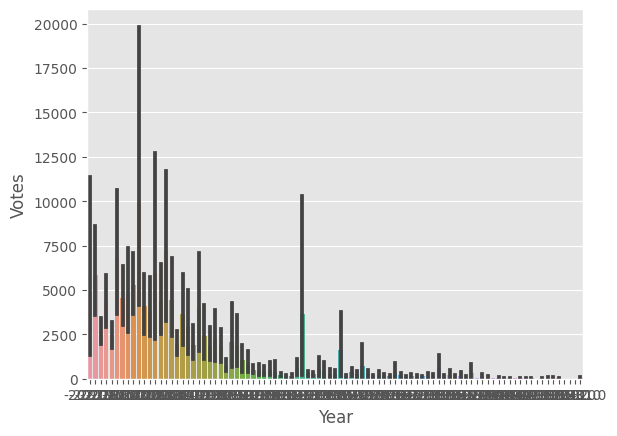

In [94]:
sns.barplot(x='Year', y='Votes', data=data)

### Visualizing the data

<Axes: xlabel='Year', ylabel='Rating'>

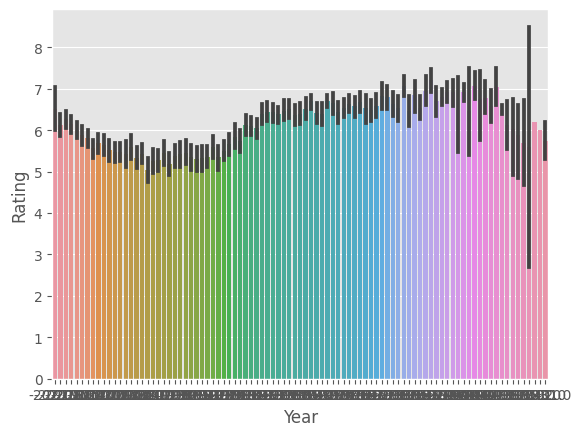

In [96]:
sns.barplot(x='Year', y='Rating', data=data)

<Axes: xlabel='Duration', ylabel='Rating'>

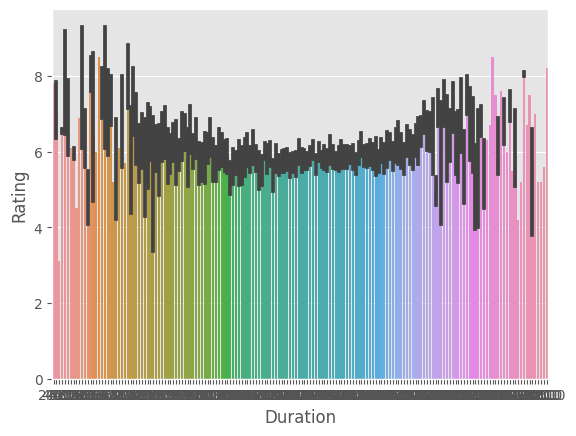

In [98]:
sns.barplot(x='Duration', y='Rating', data=data)

<Axes: xlabel='Votes', ylabel='Rating'>

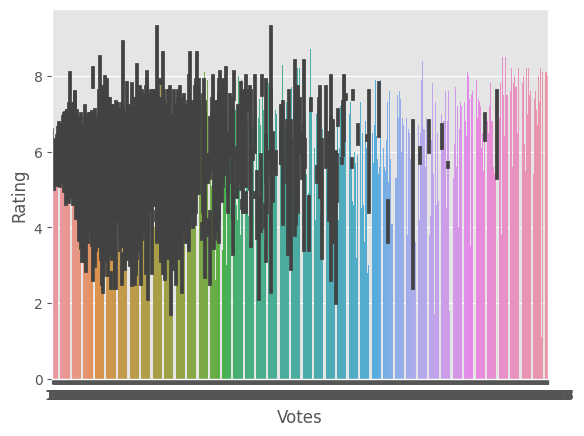

In [99]:
sns.barplot(x='Votes', y='Rating', data=data)

### Import library

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm 
from xgboost import XGBRegressor
import shap
import optuna

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

### Build XGB Regression model

#### Defines the regression model

In [102]:
target = 'Rating'
X = data.drop(columns=[target,'Duration'])
y = data[target]

In [103]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#### Data splitting

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### Fitting the model

In [105]:
# Define objective function for Optuna
def objective(trial):
    # Define hyperparameters to search
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'verbosity': 0,
    }
    
    xgb = XGBRegressor(**param)

    # Fit the model on training data
    xgb.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = xgb.predict(X_test)

    r2 = r2_score(y_test, y_pred)

    return r2

# Perform hyperparameter optimization using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print the best trial and parameters found
print("Best trial:")
best_trial = study.best_trial
print(f"  Value: {best_trial.value}")
print("  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")
    
# Use the best parameters to train the final model
best_params = best_trial.params

[I 2024-08-11 14:47:43,233] A new study created in memory with name: no-name-ed220afd-1827-4797-97ad-e6bcd756b6e4
[I 2024-08-11 14:47:43,570] Trial 0 finished with value: 0.349791054641596 and parameters: {'n_estimators': 499, 'max_depth': 4, 'learning_rate': 0.09221139700777498, 'subsample': 0.9954394516551455, 'colsample_bytree': 0.9432664842093658, 'reg_alpha': 9.975512854574703, 'reg_lambda': 8.130332207163153}. Best is trial 0 with value: 0.349791054641596.
[I 2024-08-11 14:47:43,906] Trial 1 finished with value: 0.3300009380365245 and parameters: {'n_estimators': 824, 'max_depth': 3, 'learning_rate': 0.07526704338537192, 'subsample': 0.6849692563251563, 'colsample_bytree': 0.626458848634717, 'reg_alpha': 0.9555937747804166, 'reg_lambda': 2.296009103371166}. Best is trial 0 with value: 0.349791054641596.
[I 2024-08-11 14:47:44,188] Trial 2 finished with value: 0.3480201711133081 and parameters: {'n_estimators': 320, 'max_depth': 7, 'learning_rate': 0.06654209252195614, 'subsample'

Best trial:
  Value: 0.3584989253386609
  Params: 
    n_estimators: 500
    max_depth: 4
    learning_rate: 0.04610931348439517
    subsample: 0.7364038406218647
    colsample_bytree: 0.8121953131394839
    reg_alpha: 9.943576635552358
    reg_lambda: 1.8363916116212442


In [106]:
xgb_normal = XGBRegressor(**best_params)

xgb_normal.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_test,y_test)], verbose=0)

# Make prediction on the test set
y_pred_test = xgb_normal.predict(X_test)

mean_absolute_error(y_test,y_pred_test)



0.8638922050647939

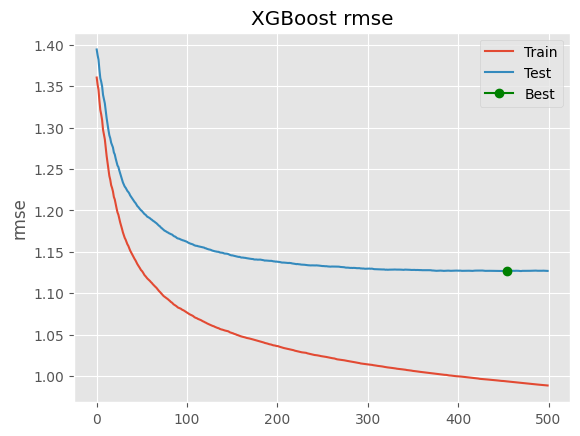

In [107]:
results = xgb_normal.evals_result()
val_rmse = results["validation_1"]['rmse']
best_epopch = min(val_rmse)
i_best_epoch = val_rmse.index(best_epopch)
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
    
# plot m log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.plot(i_best_epoch, best_epopch, marker="o", color="green", label="Best")
ax.legend()
plt.ylabel('rmse')
plt.title('XGBoost rmse')
plt.show()

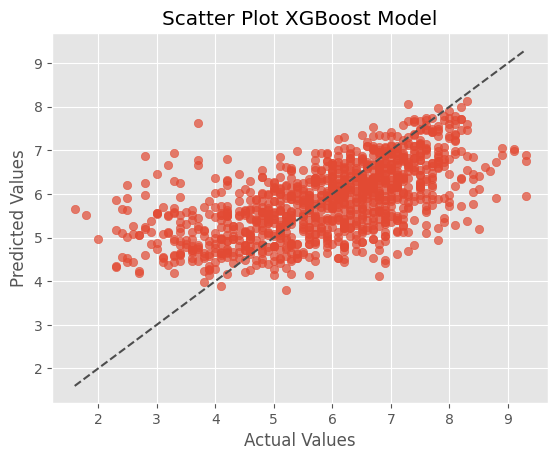

In [108]:
plt.scatter(y_test, y_pred_test, alpha=0.7, label='Real')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], '--', c='.3')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot XGBoost Model')
plt.show()

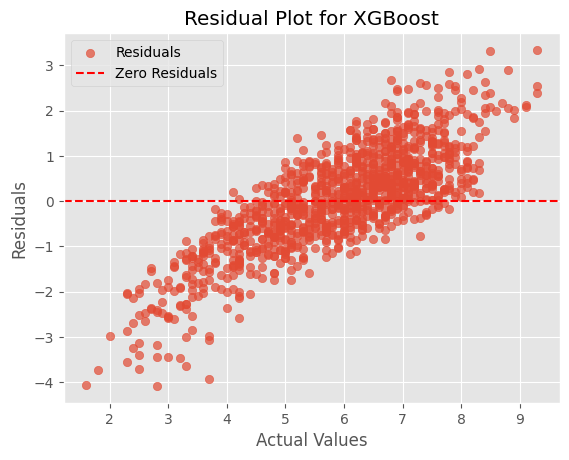

In [109]:
residuals = y_test - y_pred_test
plt.scatter(y_test, residuals, label='Residuals', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for XGBoost')
plt.legend()
plt.show()

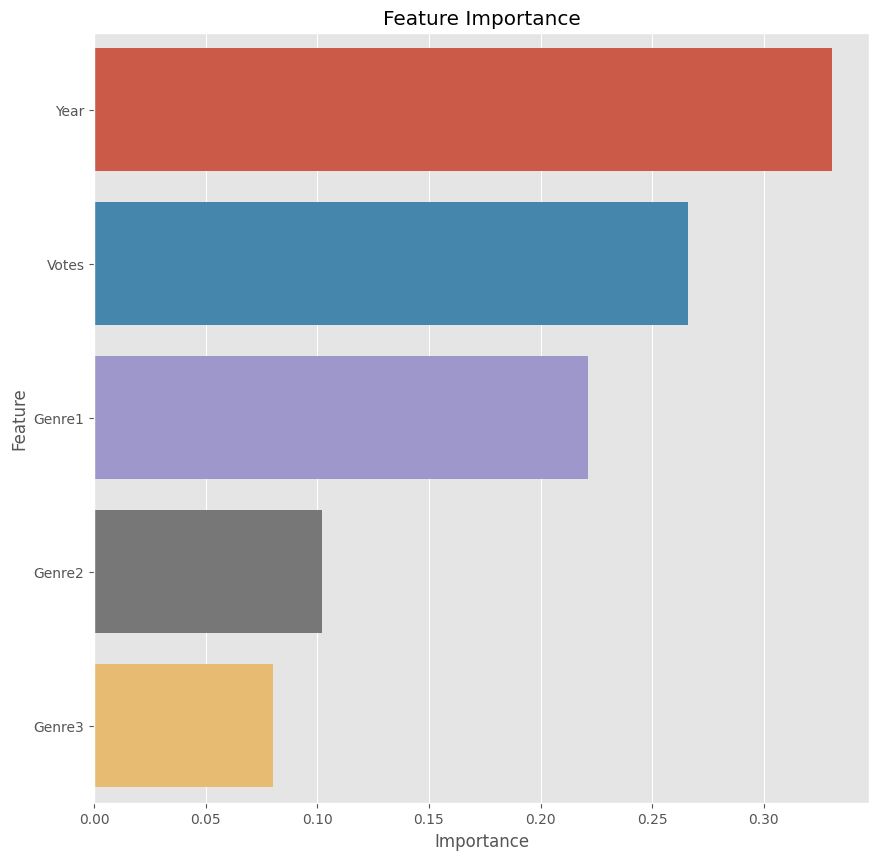

In [110]:
def plot_feature_importance(model, feature_names=None, plot=True):

    feature_importance = model.feature_importances_
    
    if feature_names is None:
        feature_names = model.feature_name()

    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    if plot:
        plt.figure(figsize=(10, 10))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title('Feature Importance')
        plt.show()

    return feature_importance_df

feature_importance_df = plot_feature_importance(xgb_normal,feature_names=data.drop(columns=[target,'Duration']).columns)
